In [1]:
# example 9-3

from sklearn.preprocessing import LabelEncoder 
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np

df = pd.read_excel(r'data\animals.xlsx')
with pd.option_context('display.max_rows', 10): display(df)

#ข้อมูลชุดนี้มีคอลัมน์ดังนี้
#'Name', 'Blood_Temperature', 'Give_Birth', 'Can_Fly', 
#'Live_In_Water', 'Have_Legs', 'Species'
#แต่เราไม่ใช้คอลัมน์ 'Name' ใน Tran Model ดังนั้น เพื่อให้ง่ายต่อการอ้างอิง
#จึงจะลบคอลัมน์ 'Name' ออกจาก DataFrame
df.drop(columns=['Name'], inplace=True)

#with pd.option_context('display.max_rows', 10): display(df)  

#ใช้จัดเก็บอินสแตนซ์ LabelEncoder ของแต่ละคอลัมน์
encoders = []

#เนื่องจากคอลัมน์ที่จะเข้ารหัสนั้นอยู่ติดกัน#จึงสามารถใช้ลูป for ได้
for i in range(0, len(df.columns) - 1):
    #สร้างอินสแตนซ์ของ LabelEncoder ที่จะใช้เข้ารหัสของคอลัมน์นั้น
    enc = LabelEncoder()
    
    #เข้ารหัสคอลัมน์ในลำดับนั้น
    df.iloc[:, i] = enc.fit_transform(df.iloc[:, i])
    
    #เก็บอินสแตนซ์ที่ใช้เข้ารหัสแต่ละคอลัมน์ไว้ในลิสต์
    encoders.append(enc)

#with pd.option_context('display.max_rows', 6): display(df)    

x = df.iloc[:, 0:5]
y = df['Species']

model = DecisionTreeClassifier(criterion='entropy')  #'gini'
model.fit(x, y)

#ค่าที่จะทำนายผล
#Blood_Tem, Give_Birth, Can_Fly, Live_In_Water, Have_Legs
x_pred = ['Warm', 'No', 'Yes', 'Sometimes', 'No']

#เข้ารหัสแต่ละค่าที่จะทำนายผล
#ด้วยอินสแตนซ์เดิมที่เก็บไว้ในลิสต์
for i in range(0, len(df.columns) - 1):
    x_pred[i] = encoders[i].transform([x_pred[i]])

#แปลงเป็นอาร์เรย์ที่มี 5 คอลัมน์ (ตามจำนวน Features)
x_pred_a = np.array(x_pred).reshape(-1, 5) #หรือ len(df.columns)-1
y_pred = model.predict(x_pred_a)

print('Prediction:', y_pred[0])

score = model.score(x, y)
print('Accuracy:', '{:.2f}'.format(score))


,Name,Blood_Temperature,Give_Birth,Can_Fly,Live_In_Water,Have_Legs,Species
0,Human,Warm,Yes,No,No,Yes,Mammals
1,Python,Cold,No,No,No,No,Reptiles
2,Bat,Warm,Yes,Yes,No,Yes,Mammals
3,Frog,Cold,No,No,Sometimes,Yes,Amphibians
4,Salmon,Cold,No,No,Yes,No,Fishes
...,...,...,...,...,...,...,...
15,Platypus,Warm,No,No,No,Yes,Mammals
16,Owl,Warm,No,Yes,No,Yes,Birds
17,Dolphin,Warm,Yes,No,Yes,No,Mammals
18,Eel,Cold,No,No,Yes,No,Fishes


Prediction: Birds
Accuracy: 0.95


C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [2]:
#example 9-4

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

df = pd.read_excel(r'data\sunburned.xlsx')
with pd.option_context('display.max_rows', 8): display(df)

#ใช้จัดเก็บอินสแตนซ์ LabelEncoder ของแต่ละคอลัมน์
encoders = []

#เนื่องจากคอลัมน์ที่จะเข้ารหัสนั้นอยู่ติดกัน
#จึงสามารถใช้ลูป for ได้
for i in range(0, len(df.columns) - 1):
    #สร้างอินสแตนซ์ของ LabelEncoder ที่จะใช้เข้ารหัสของคอลัมน์นั้น
    enc = LabelEncoder()
    
    #เข้ารหัสคอลัมน์ในลำดับนั้น
    df.iloc[:, i] = enc.fit_transform(df.iloc[:, i])
    
    #เก็บอินสแตนซ์ที่ใช้เข้ารหัสแต่ละคอลัมน์ไว้ในลิสต์
    encoders.append(enc)

#with pd.option_context('display.max_rows', 10): display(df)    

x = df.iloc[:, 0:4]
y = df['Sunburned']

model = DecisionTreeClassifier(criterion='entropy')  #'gini'
model.fit(x, y)

#ค่าที่จะทำนายผล
x_pred = ['Black', 'Light', 'Overweight', 'Yes']

#เข้ารหัสแต่ละค่าที่จะทำนายผล
#ด้วยอินสแตนซ์เดิมที่เก็บไว้ในลิสต์
for i in range(0, len(df.columns) - 1):
    x_pred[i] = encoders[i].transform([x_pred[i]])

#แปลงเป็นอาร์เรย์ที่มี 4 คอลัมน์ (ตามจำนวน Features)
x_pred_a = np.array(x_pred).reshape(-1, 4) #หรือ len(df.columns)-1
y_pred = model.predict(x_pred_a)

for i in range(0, len(df.columns) - 1):
    #แปลงตัวเลขที่เข้ารหัสกลับไปเป็นสตริงที่เข้าใจได้เพื่อการแสดงผล
    s = encoders[i].inverse_transform(x_pred[i])   
    print(f'{df.columns[i]}: {s[0]}, ', end='')

print('Sunburned:', y_pred[0])

score = model.score(x, y)
print('Accuracy:', '{:.2f}'.format(score))

,Hair,Eye,Weight,Lotion,Sunburned
0,Black,Dark,Overweight,No,No
1,Red,Dark,Average,No,Yes
2,Blonde,Light,Overweight,No,Yes
3,Red,Light,Underweight,No,Yes
...,...,...,...,...,...
10,Black,Light,Average,Yes,Yes
11,Blonde,Light,Underweight,No,Yes
12,Red,Dark,Average,Yes,No
13,Black,Light,Underweight,No,Yes


Hair: Black, Eye: Light, Weight: Overweight, Lotion: Yes, Sunburned: Yes
Accuracy: 1.00


C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


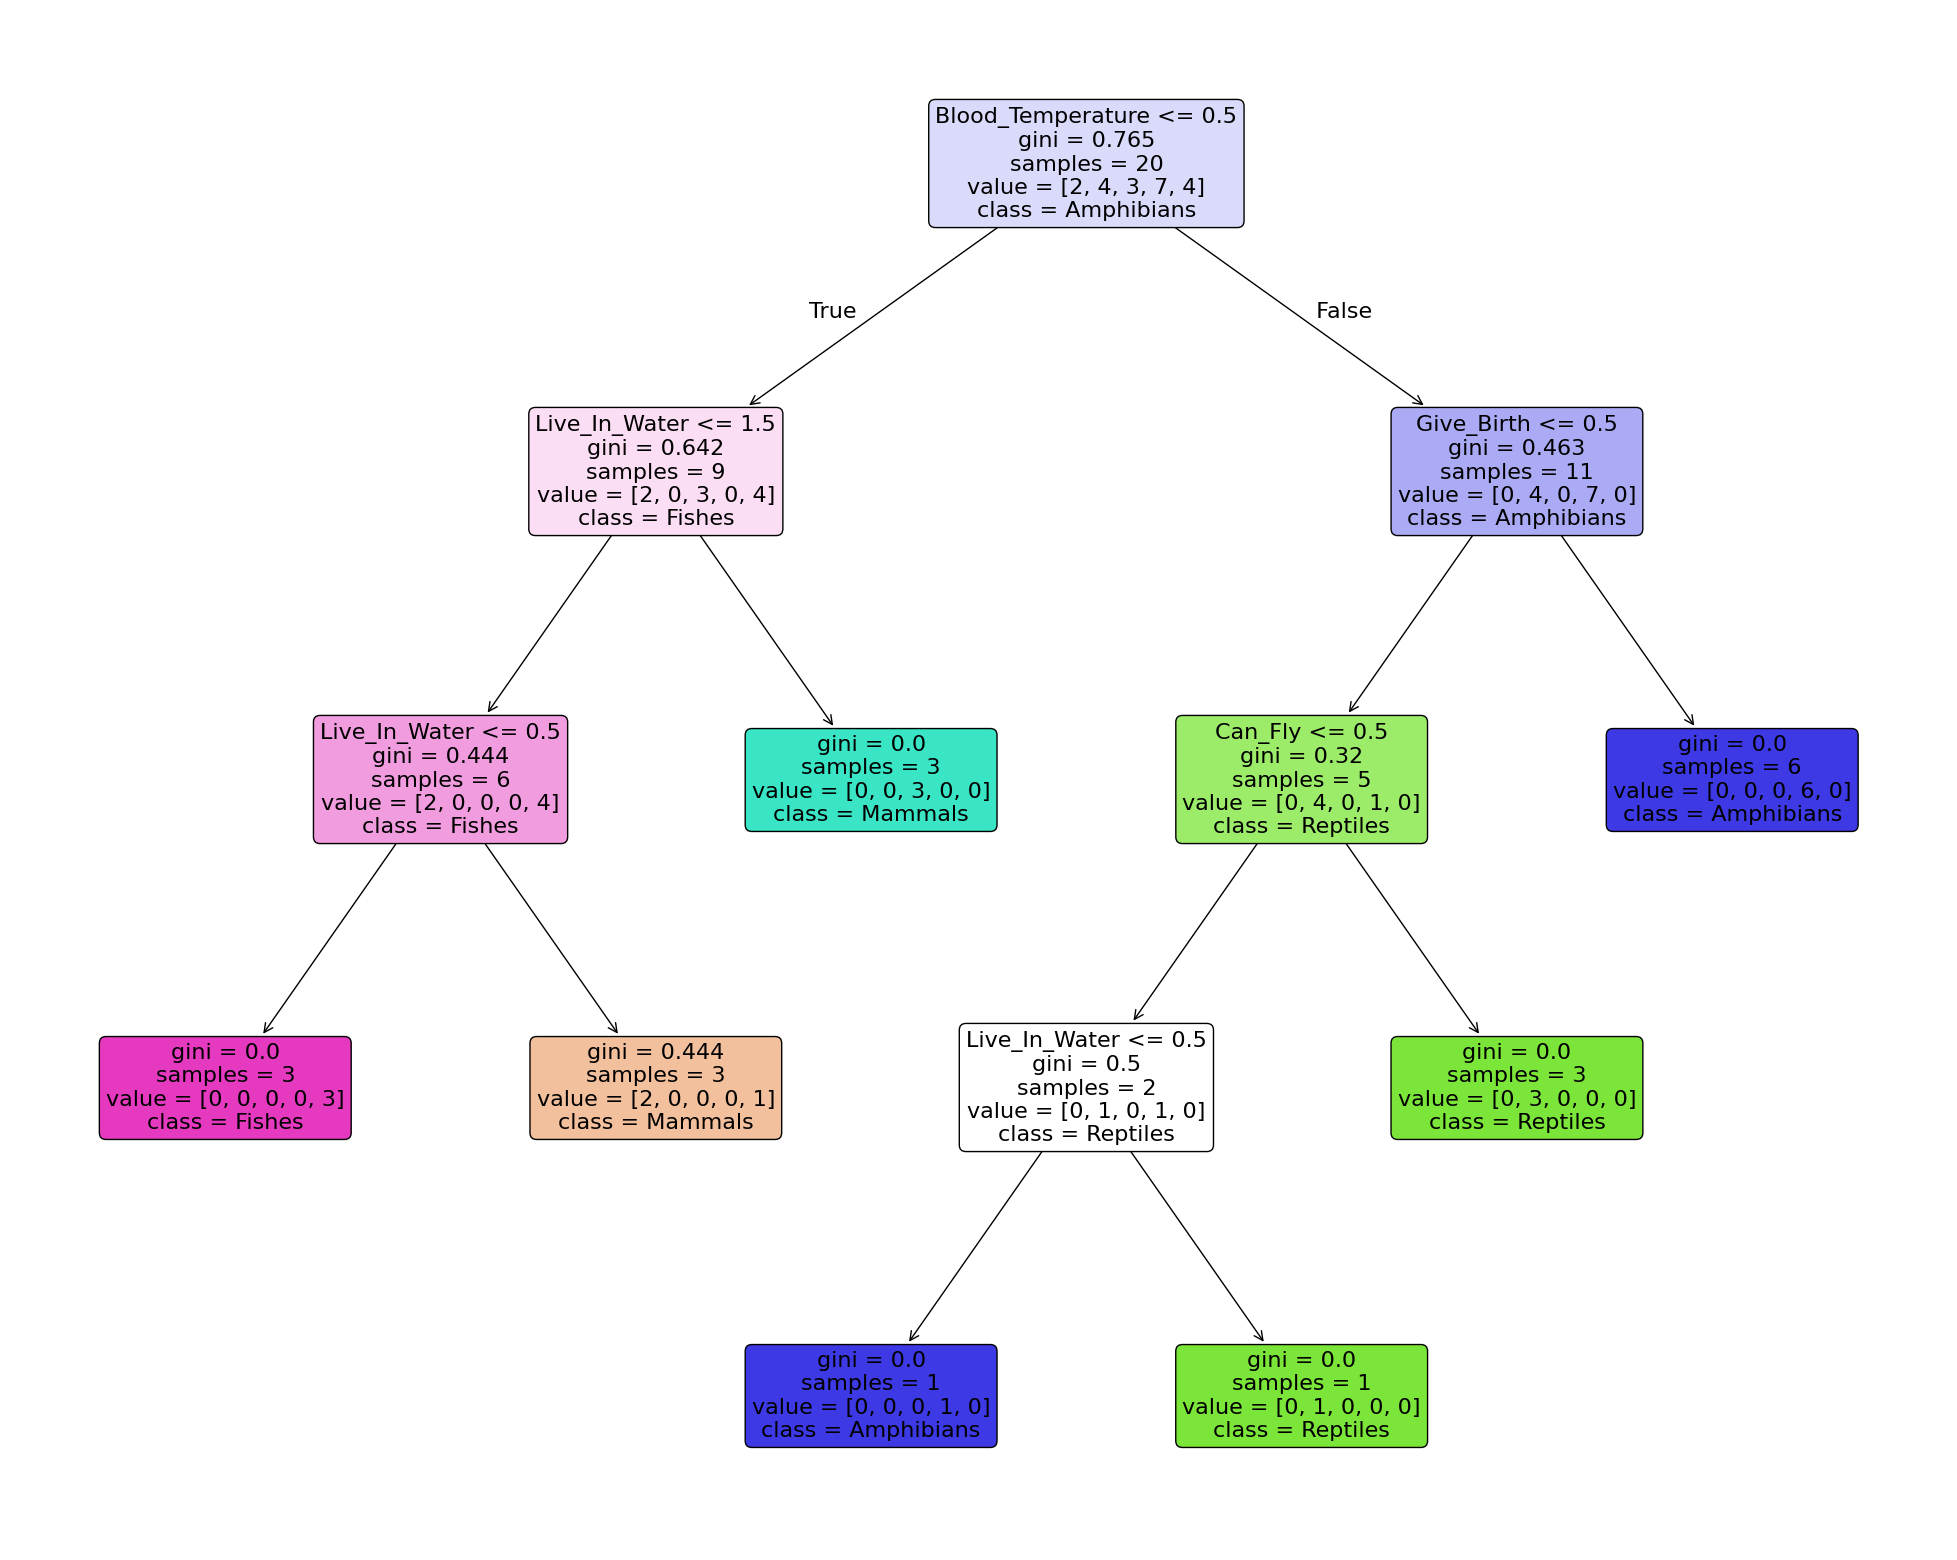

In [3]:
# example 9-5

from sklearn.preprocessing import LabelEncoder 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_excel(r'data\animals.xlsx')
#with pd.option_context('display.max_rows', 10): display(df)

x = df.iloc[:, 1:6]  #เลือกทุกแถว, คอลัมน์ที่ 1-5
y = df['Species']

x = x.apply(LabelEncoder().fit_transform)

model = DecisionTreeClassifier(criterion='gini')  #max_depth=2
model.fit(x, y)

plt.figure(figsize=(25, 20))

t = plot_tree(model, 
              feature_names=x.columns,  
              class_names=y,
              label='all',     
              impurity=True,
              precision=3,     
              filled=True,
              rounded=True,
              fontsize=16)

plt.show()

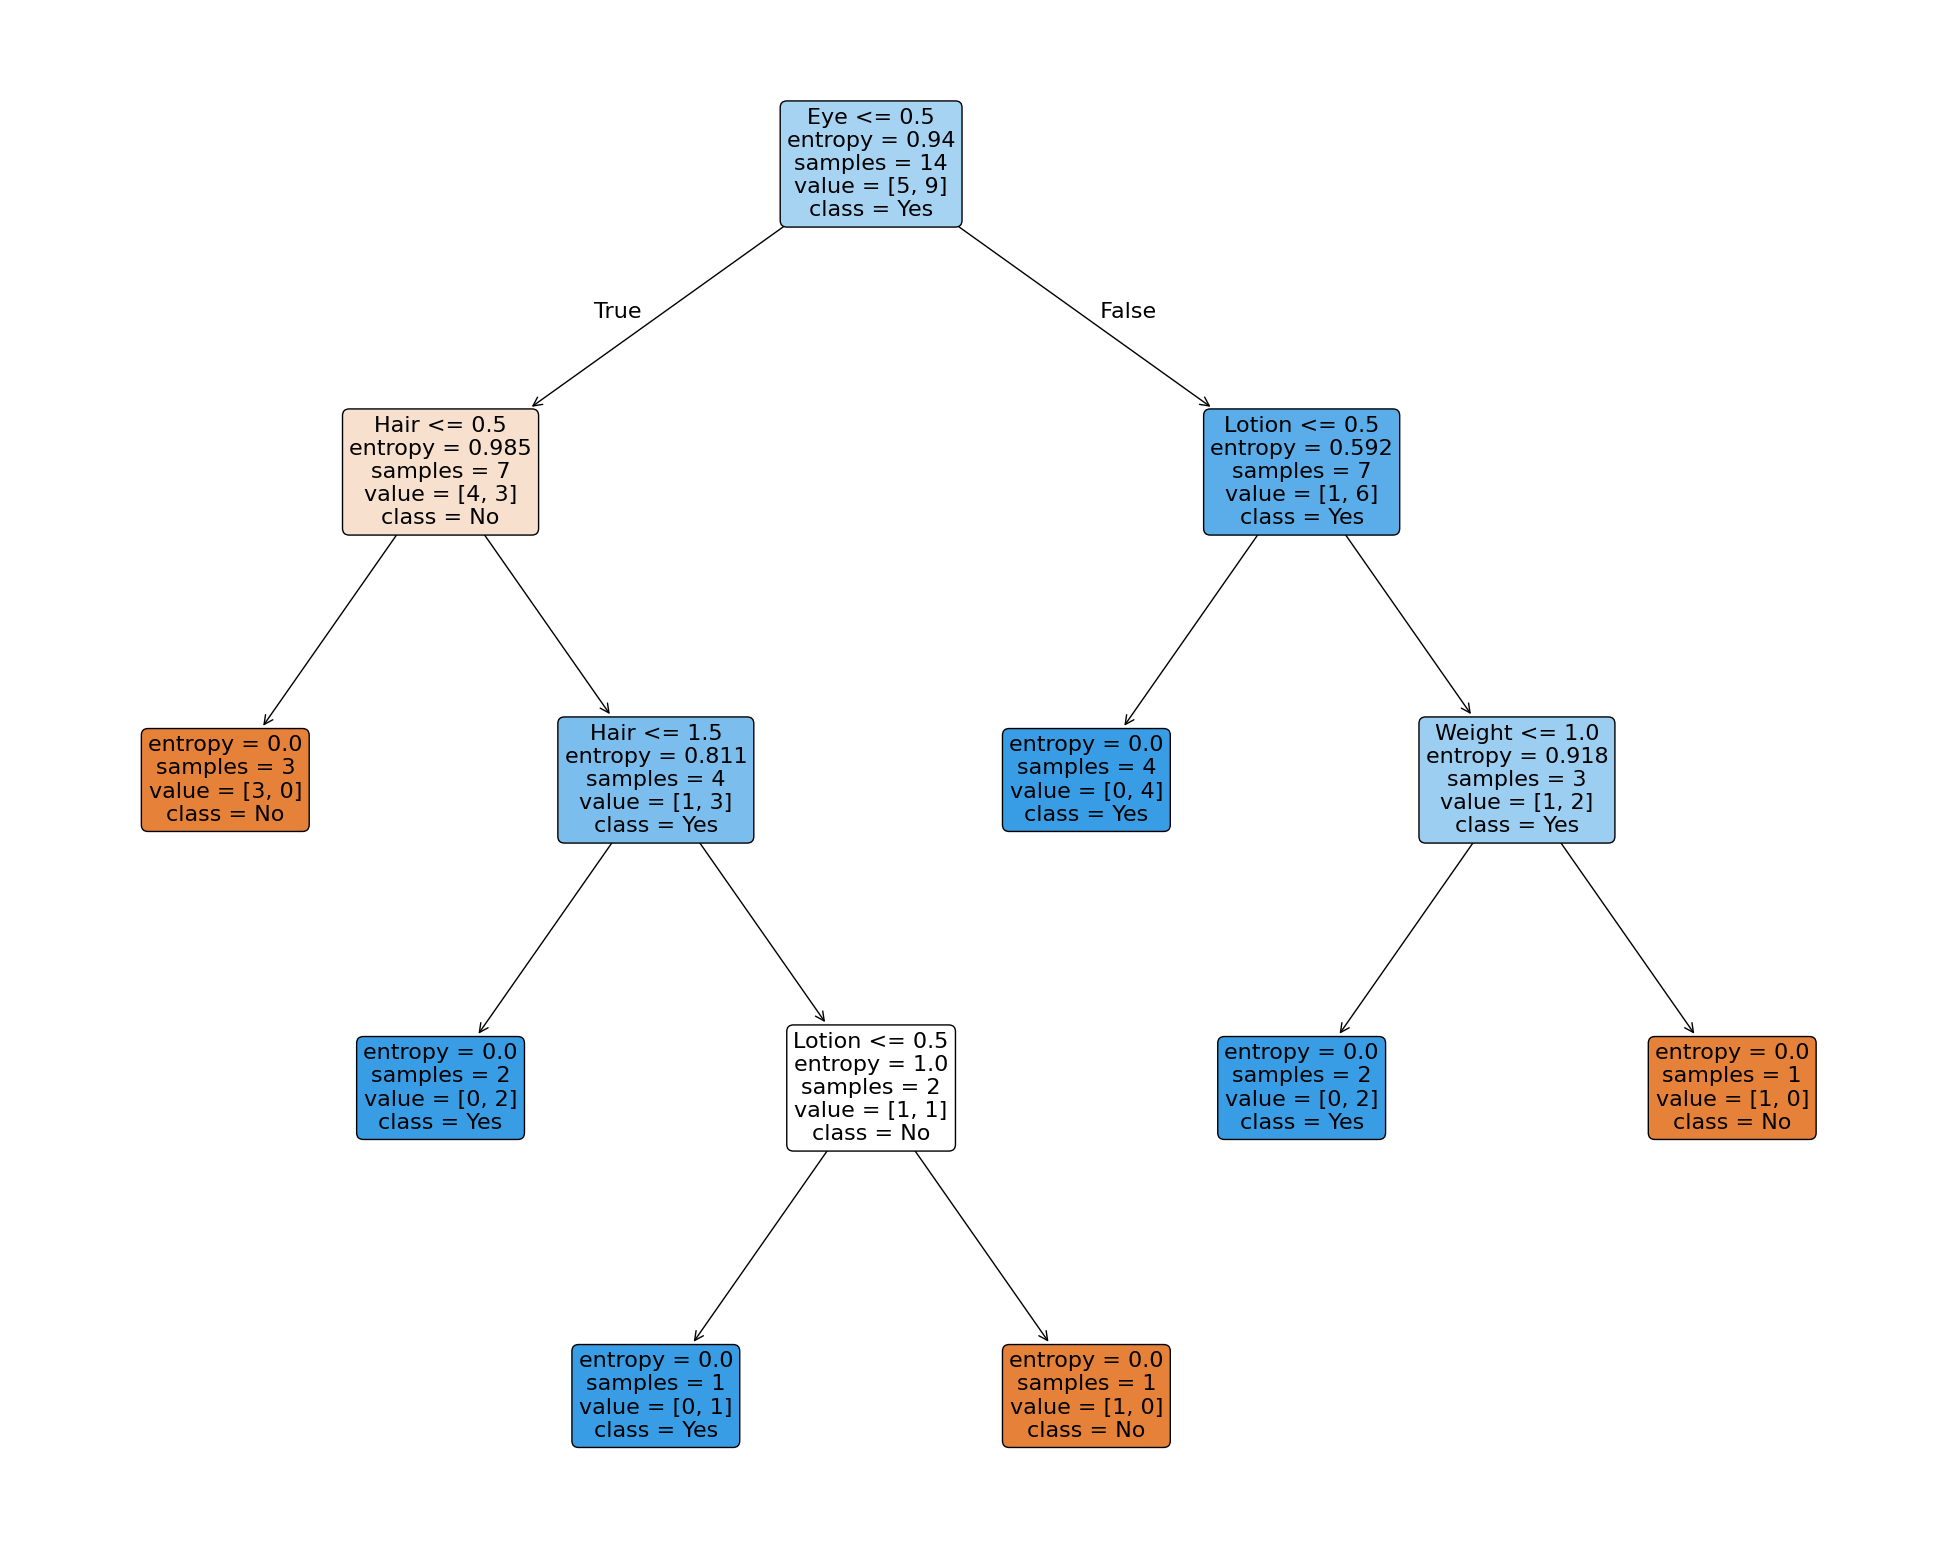

In [4]:
# example 9-6

from sklearn.preprocessing import LabelEncoder 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_excel(r'data\sunburned.xlsx')
#with pd.option_context('display.max_rows', 10): display(df)

x = df.iloc[:, 0:4]  #เลือกทุกแถว, คอลัมน์ที่ 0-3
y = df['Sunburned']

x = x.apply(LabelEncoder().fit_transform)

model = DecisionTreeClassifier(criterion='entropy') #max_depth=3
model.fit(x, y)

plt.figure(figsize=(25, 20))

_ = plot_tree(model, 
              feature_names=x.columns,  
              class_names=y,
              label='all',     
              impurity=True,
              precision=3,     
              filled=True,
              rounded=True,
              fontsize=16)

plt.show()

In [10]:
#example 9-7

from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


df = pd.read_excel(r'data\weather_players.xlsx')
with pd.option_context('display.max_rows', 6): display(df)

encoders = []

for i in range(0, len(df.columns) - 1):
    enc = LabelEncoder()
    df.iloc[:, i] = enc.fit_transform(df.iloc[:, i])
    encoders.append(enc)

with pd.option_context('display.max_rows', 14): display(df)    
 
x = df.iloc[:, 0:4]
y = df['Players']

model = DecisionTreeRegressor(criterion='mse')  #mse, mae
model.fit(x, y)

#ค่าที่จะทำนายผล
x_pred = ['Overcast', 'Cool', 'High', 'Weak']

#เข้ารหัสแต่ละค่าที่จะทำนายผล
for i in range(0, len(df.columns) - 1):
    x_pred[i] = encoders[i].transform([x_pred[i]])

#แปลงเป็นอาร์เรย์ที่มี 4 คอลัมน์ (ตามจำนวน Features)
x_pred_a = np.array(x_pred).reshape(-1, 4) #หรือ len(df.columns)-1
y_pred = model.predict(x_pred_a)

#แปลงตัวเลขที่เข้ารหัสกลับไปเป็นสตริงที่เข้าใจได้เพื่อการแสดงผล
for i in range(0, len(df.columns) - 1):
    s = encoders[i].inverse_transform(x_pred[i])   
    print(f'{df.columns[i]}: {s[0]}, ', end='')

print('Players:', '{:.0f}'.format(y_pred[0]))

score = model.score(x, y)
print('Accuracy:', '{:.2f}'.format(score))

plt.figure(figsize=(25, 20))

_ = plot_tree(model, 
              feature_names=x.columns,  
              class_names=y,
              label='all',     
              impurity=True,
              precision=3,     
              filled=True,
              rounded=True,
              fontsize=16)

plt.show()

,Outlook,Temp,Humidity,Wind,Players
0,Sunny,Hot,High,Weak,25
1,Sunny,Hot,High,Strong,30
2,Overcast,Hot,High,Weak,46
...,...,...,...,...,...
11,Overcast,Mild,High,Strong,52
12,Overcast,Hot,Normal,Weak,44
13,Rain,Mild,High,Strong,30


,Outlook,Temp,Humidity,Wind,Players
0,2,1,0,1,25
1,2,1,0,0,30
2,0,1,0,1,46
3,1,2,0,1,45
4,1,0,1,1,52
5,1,0,1,0,23
6,0,0,1,0,43
7,2,2,0,1,35
8,2,0,1,1,38
9,1,2,1,1,46


InvalidParameterError: The 'criterion' parameter of DecisionTreeRegressor must be a str among {'squared_error', 'poisson', 'friedman_mse', 'absolute_error'}. Got 'mse' instead.